In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

In [2]:
data = pd.read_csv('mxmh_survey_results.csv')
data.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


## Data cleaning and pre-processing

In [3]:
data.shape

(736, 33)

In [4]:
data = data.drop(columns=['Timestamp','Permissions'])

In [5]:
data.isnull().sum()

Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [6]:
data = data.dropna(subset=['Age','Primary streaming service','Composer','While working','Instrumentalist','Foreign languages','Music effects'])

In [7]:
data.shape

(718, 31)

In [8]:
data.isna().sum()

Age                               0
Primary streaming service         0
Hours per day                     0
While working                     0
Instrumentalist                   0
Composer                          0
Fav genre                         0
Exploratory                       0
Foreign languages                 0
BPM                             102
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                           0
Depression                  

In [9]:
data['BPM'].head()

2    132.0
3     84.0
4    107.0
5     86.0
6     66.0
Name: BPM, dtype: float64

In [10]:
mean_bpm = data['BPM'].mean()
print("The mean BPM is: ", mean_bpm)

The mean BPM is:  1623500.0016233767


(array([615.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.00000000e+00, 9.99999999e+07, 2.00000000e+08, 3.00000000e+08,
        4.00000000e+08, 5.00000000e+08, 5.99999999e+08, 6.99999999e+08,
        7.99999999e+08, 8.99999999e+08, 9.99999999e+08]),
 <BarContainer object of 10 artists>)

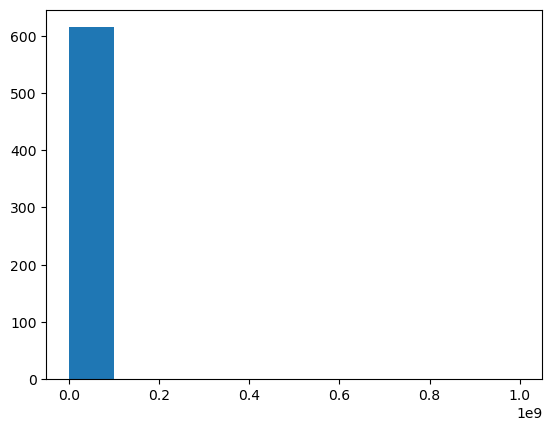

In [11]:
plt.hist(data['BPM'])

#### Assessing the null values for each genre

In [12]:
data['Fav genre'].unique()

array(['Video game music', 'Jazz', 'R&B', 'K pop', 'Rock', 'Country',
       'EDM', 'Pop', 'Hip hop', 'Rap', 'Classical', 'Metal', 'Folk',
       'Lofi', 'Gospel', 'Latin'], dtype=object)

In [13]:
bpm_jazz_mean = data.loc[data['Fav genre']== 'Jazz','BPM'].mean()
bpm_jazz = data.loc[data['Fav genre']== 'Jazz',['Fav genre','BPM']]

In [14]:
print("The average BPM for Jazz music lovers is...", bpm_jazz_mean)

The average BPM for Jazz music lovers is... 124.47368421052632


In [15]:
bpm_jazz.head()

,Fav genre,BPM
3,Jazz,84.0
5,Jazz,86.0
14,Jazz,148.0
75,Jazz,167.0
81,Jazz,118.0


In [16]:
bpm_jazz.describe()

,BPM
count,19.000000
mean,124.473684
std,36.925403
min,81.000000
25%,91.500000
50%,120.000000
75%,144.000000
max,200.000000


In [17]:
bpm_jazz['BPM'].isna().sum()

1

In [18]:
data.loc[(data['Fav genre'] == 'Jazz') & data['BPM'].notna()]

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
14,18.0,Spotify,4.0,Yes,Yes,No,Jazz,Yes,Yes,148.0,...,Sometimes,Never,Never,Sometimes,Rarely,6.0,4.0,7.0,0.0,Improve
75,16.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,167.0,...,Very frequently,Rarely,Very frequently,Sometimes,Never,7.0,7.0,8.0,4.0,Improve
81,19.0,Spotify,3.0,Yes,No,No,Jazz,Yes,No,118.0,...,Sometimes,Sometimes,Sometimes,Rarely,Very frequently,3.0,0.0,0.0,0.0,Improve
86,14.0,Spotify,7.0,Yes,Yes,No,Jazz,No,No,110.0,...,Sometimes,Never,Never,Very frequently,Very frequently,2.0,0.0,0.0,0.0,Improve
124,29.0,Other streaming service,5.0,Yes,No,No,Jazz,Yes,Yes,200.0,...,Never,Sometimes,Never,Very frequently,Sometimes,7.0,2.0,3.0,1.0,Improve
146,22.0,Other streaming service,6.0,Yes,Yes,Yes,Jazz,Yes,Yes,140.0,...,Very frequently,Very frequently,Very frequently,Sometimes,Sometimes,8.0,8.0,8.0,5.0,Improve
147,17.0,Spotify,2.0,Yes,Yes,Yes,Jazz,Yes,No,94.0,...,Very frequently,Never,Rarely,Very frequently,Rarely,5.0,2.0,3.0,4.0,Improve
283,22.0,Spotify,6.0,Yes,No,No,Jazz,Yes,Yes,140.0,...,Sometimes,Sometimes,Rarely,Very frequently,Sometimes,8.0,8.0,7.0,1.0,Improve


In [19]:
data.head()

,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
2,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve
5,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,86.0,...,Very frequently,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve
6,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,66.0,...,Rarely,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve


In [20]:
bpm_vid_mean = data.loc[data['Fav genre']== 'Video game music','BPM'].mean()
bpm_vid = data.loc[data['Fav genre']== 'Video game music',['Fav genre','BPM']]

In [22]:
print("The mean BPM for video game music is ",bpm_vid_mean)

The mean BPM for video game music is  27777895.027777776


In [23]:
bpm_vid.describe()

,BPM
count,3.600000e+01
mean,2.777790e+07
std,1.666666e+08
min,6.000000e+01
25%,9.500000e+01
50%,1.225000e+02
75%,1.475000e+02
max,1.000000e+09


In [24]:
bpm_vid['BPM'].isna().sum()

7